# **Preprocessing**

### Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler as SC
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [ ]:
data_original = pd.read_csv("Copy of bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")
data_original

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


### Reversing the data to make it sorted according to the dates

In [ ]:
data_original = data_original[::-1]
data_original

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


### Analysis of data

In [ ]:
data_original.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 1555 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


### Conversion of date column to format of YYYY-MM-DD

In [ ]:
data_original['Date'] = pd.to_datetime(data_original.Date)
data_original

# data = data_original.set_index(['Date'])
# data

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


### Converting Market Cap values from str to int type

In [ ]:
data = data_original.copy()

data['Market Cap'] = data['Market Cap'].str.replace(',', '').astype('int64')
data

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,1500520000
1554,2013-04-29,134.44,147.49,134.00,144.54,-,1491160000
1553,2013-04-30,144.00,146.93,134.05,139.00,-,1597780000
1552,2013-05-01,139.00,139.89,107.72,116.99,-,1542820000
1551,2013-05-02,116.38,125.60,92.28,105.21,-,1292190000
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000",41816500000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000",44144400000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000",46246700000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000",44890700000


In [ ]:
data_original['Market Cap'] = data_original['Market Cap'].str.replace(',', '').astype('int64')

### Checking invalid entries in Volume column

In [ ]:
data[data.Volume == '-']

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,1500520000
1554,2013-04-29,134.44,147.49,134.00,144.54,-,1491160000
1553,2013-04-30,144.00,146.93,134.05,139.00,-,1597780000
1552,2013-05-01,139.00,139.89,107.72,116.99,-,1542820000
1551,2013-05-02,116.38,125.60,92.28,105.21,-,1292190000
...,...,...,...,...,...,...,...
1317,2013-12-22,601.78,666.74,585.64,617.18,-,7315940000
1316,2013-12-23,613.06,680.91,611.04,673.41,-,7455670000
1315,2013-12-24,672.36,684.39,645.71,665.58,-,8179730000
1314,2013-12-25,666.31,682.70,649.48,682.21,-,8108930000


In [ ]:
data_copy = data.copy()
data_copy = data_copy[::-1]
for i in range(len(data_copy)):
    if (data_copy.iloc[i,5] == '-'):
        data_copy.iloc[i,5] = 0

In [ ]:
data_copy

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000",45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000",44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000",46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000",44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000",41816500000
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,0,1292190000
1552,2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
1553,2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
1554,2013-04-29,134.44,147.49,134.00,144.54,0,1491160000


In [ ]:
data_copy['Volume'] = data_copy['Volume'].str.replace(',', '').astype('float')
data_copy

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,41816500000
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,NaN,1292190000
1552,2013-05-01,139.00,139.89,107.72,116.99,NaN,1542820000
1553,2013-04-30,144.00,146.93,134.05,139.00,NaN,1597780000
1554,2013-04-29,134.44,147.49,134.00,144.54,NaN,1491160000


### Replacing Null values with mean and plotting the graph

In [ ]:
mean_value = data_copy['Volume'].mean()
data_copy['Volume'].fillna(value=int(mean_value), inplace=True)
data_copy

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,41816500000
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,1.481642e+08,1292190000
1552,2013-05-01,139.00,139.89,107.72,116.99,1.481642e+08,1542820000
1553,2013-04-30,144.00,146.93,134.05,139.00,1.481642e+08,1597780000
1554,2013-04-29,134.44,147.49,134.00,144.54,1.481642e+08,1491160000


In [ ]:
data_copy['Volume'] = data_copy['Volume'].astype('int64')
data_copy

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,148164250,1292190000
1552,2013-05-01,139.00,139.89,107.72,116.99,148164250,1542820000
1553,2013-04-30,144.00,146.93,134.05,139.00,148164250,1597780000
1554,2013-04-29,134.44,147.49,134.00,144.54,148164250,1491160000


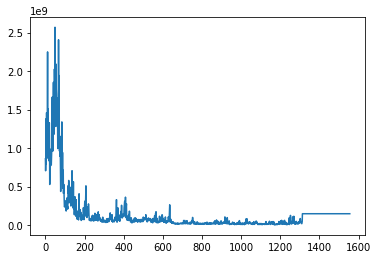

In [ ]:
plt.plot(data_copy['Volume'])
plt.show()

### Instead of replacing with mean, applying polynomial curve fitting to predict the invalid entries

In [ ]:
x_data = data_copy.iloc[:1313,6].values
y_data = data_copy.iloc[:1313,5].values
ylog_data = np.log(y_data)
curve_fit = np.polyfit(x_data, ylog_data, 1)
print(curve_fit)

[1.14669401e-10 1.66633617e+01]


In [ ]:
y_data.shape

(1313,)

In [ ]:
y_vol = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x_data)

In [ ]:
vol_data = np.concatenate((y_data,y_vol[1313:]),axis=0)
vol_data

array([8.60575e+08, 7.05943e+08, 8.03746e+08, ..., 1.90113e+07,
       3.25058e+07, 4.68627e+07])

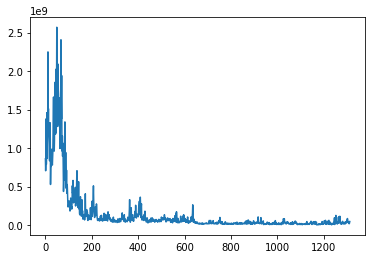

In [ ]:
plt.plot(vol_data)
plt.show()

### Dropping the rows with Null entry

In [ ]:
data.drop(data.loc[data['Volume']=='-'].index, inplace=True)
data

,Date,Open,High,Low,Close,Volume,Market Cap
1312,2013-12-27,763.28,777.51,713.60,735.07,"46,862,700",9295570000
1311,2013-12-28,737.98,747.06,705.35,727.83,"32,505,800",8990850000
1310,2013-12-29,728.05,748.61,714.44,745.05,"19,011,300",8872600000
1309,2013-12-30,741.35,766.60,740.24,756.13,"20,707,700",9037000000
1308,2013-12-31,760.32,760.58,738.17,754.01,"20,897,300",9268240000
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000",41816500000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000",44144400000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000",46246700000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000",44890700000


In [ ]:
data_original.drop(data_original.loc[data_original['Volume']=='-'].index, inplace=True)

### Converting the str values to int for Volume column

In [ ]:
data['Volume'] = data['Volume'].str.replace(',', '').astype('int64')
data

,Date,Open,High,Low,Close,Volume,Market Cap
1312,2013-12-27,763.28,777.51,713.60,735.07,46862700,9295570000
1311,2013-12-28,737.98,747.06,705.35,727.83,32505800,8990850000
1310,2013-12-29,728.05,748.61,714.44,745.05,19011300,8872600000
1309,2013-12-30,741.35,766.60,740.24,756.13,20707700,9037000000
1308,2013-12-31,760.32,760.58,738.17,754.01,20897300,9268240000
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


In [ ]:
data_original['Volume'] = data_original['Volume'].str.replace(',', '').astype('int64')

### Converting the date column to int values by subtracting the current date with the initial start date, i.e., counting the number of days, so that the data will not throw any error while fitting the models

In [ ]:
date_start = data.iloc[0,0]
date_start

Timestamp('2013-12-27 00:00:00')

In [ ]:
from datetime import date
for i in range(len(data)):
    delta = data.iloc[i,0] - date_start
    data.iloc[i,0] = delta.days
data

,Date,Open,High,Low,Close,Volume,Market Cap
1312,0,763.28,777.51,713.60,735.07,46862700,9295570000
1311,1,737.98,747.06,705.35,727.83,32505800,8990850000
1310,2,728.05,748.61,714.44,745.05,19011300,8872600000
1309,3,741.35,766.60,740.24,756.13,20707700,9037000000
1308,4,760.32,760.58,738.17,754.01,20897300,9268240000
...,...,...,...,...,...,...,...
4,1308,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
3,1309,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2,1310,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1,1311,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


In [ ]:
data_original

,Date,Open,High,Low,Close,Volume,Market Cap
1312,2013-12-27,763.28,777.51,713.60,735.07,46862700,9295570000
1311,2013-12-28,737.98,747.06,705.35,727.83,32505800,8990850000
1310,2013-12-29,728.05,748.61,714.44,745.05,19011300,8872600000
1309,2013-12-30,741.35,766.60,740.24,756.13,20707700,9037000000
1308,2013-12-31,760.32,760.58,738.17,754.01,20897300,9268240000
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


# **Visualisation**

### Plotting the rolling average of 30 days for Closing Price

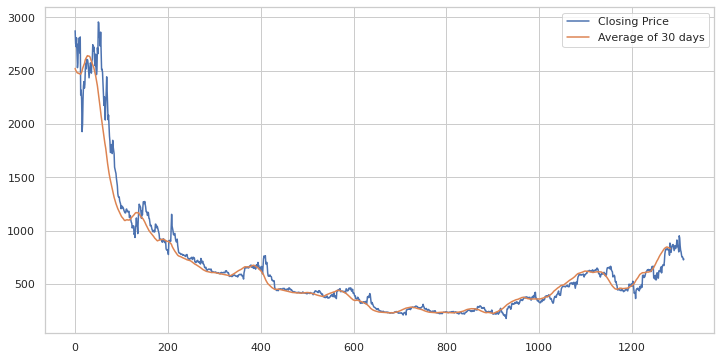

In [ ]:
sns.set()
sns.set_style('whitegrid')
data['Close'].plot(figsize=(12,6),label='Closing Price')
data['Close'].rolling(window=30).mean().plot(label='Average of 30 days')
plt.legend()

### Plotting the values of each column on y-axis with respect to dates on x-axis

In [ ]:
def plotting(data, col):
    train1 = data[['Date',col]]
    train2 = train1.set_index('Date')
    train2.sort_index(inplace=True)
    plt.plot(train2)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title("Column {} distribution of bitcoin".format(col), fontsize=15)
    plt.show()

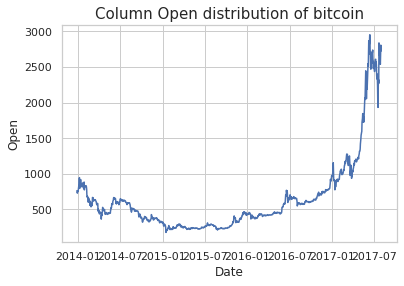

In [ ]:
plotting(data_original, "Open")

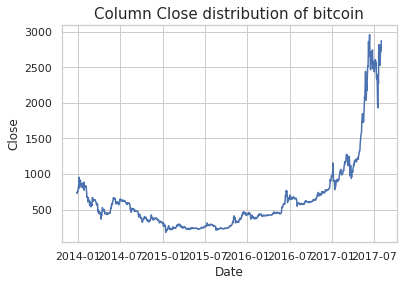

In [ ]:
plotting(data_original, "Close")

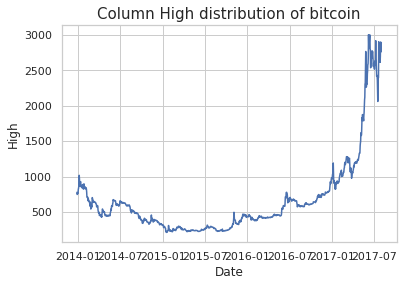

In [ ]:
plotting(data_original, "High")

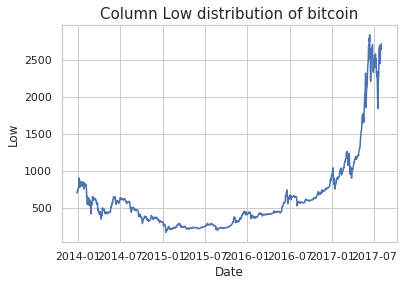

In [ ]:
plotting(data_original, "Low")

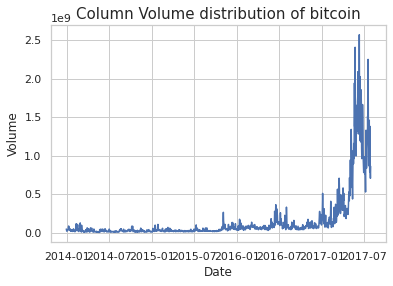

In [ ]:
plotting(data_original, "Volume")

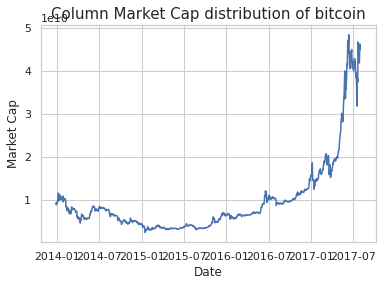

In [ ]:
plotting(data_original, "Market Cap")

# **Methodology 1**

Predictions of values on the basis of past 15 days of data

## Testing the results on Closing Price

### Making a dataframe for Date and Close column

In [ ]:
data_close = data[['Date','Close']]
data_close

,Date,Close
1312,0,735.07
1311,1,727.83
1310,2,745.05
1309,3,756.13
1308,4,754.01
...,...,...
4,1308,2671.78
3,1309,2809.01
2,1310,2726.45
1,1311,2757.18


In [ ]:
type(data_close)

pandas.core.frame.DataFrame

### Making a numpy array storing the previous 15 days data for all rows

In [ ]:
train_size = 15
new_row = []
for i in range(train_size,len(data_close)):
    row = data_close.iloc[i-train_size:i,1].to_numpy()
    new_row.append(row)

In [ ]:
new_row = np.array(new_row)
new_row

array([[ 735.07,  727.83,  745.05, ...,  842.72,  846.86,  868.48],
       [ 727.83,  745.05,  756.13, ...,  846.86,  868.48,  913.95],
       [ 745.05,  756.13,  754.01, ...,  868.48,  913.95,  863.22],
       ...,
       [2233.34, 1998.86, 1929.82, ..., 2529.45, 2671.78, 2809.01],
       [1998.86, 1929.82, 2228.41, ..., 2671.78, 2809.01, 2726.45],
       [1929.82, 2228.41, 2318.88, ..., 2809.01, 2726.45, 2757.18]])

In [ ]:
data_close = data_close.iloc[train_size:]
data_close.reset_index(inplace=True,drop=True)
print(data_close)

      Date    Close
0       15   913.95
1       16   863.22
2       17   841.20
3       18   833.27
4       19   860.90
...    ...      ...
1293  1308  2671.78
1294  1309  2809.01
1295  1310  2726.45
1296  1311  2757.18
1297  1312  2875.34

[1298 rows x 2 columns]


### Preparing the dataset with past 15 days data as the features and current day as prediction

In [ ]:
for i in range(train_size):
    col_data = new_row[:,i]
    df_add = pd.DataFrame(data=col_data)
    data_close = pd.concat([data_close,df_add], axis=1)

print(data_close)

      Date    Close        0        0        0        0        0        0  \
0       15   913.95   735.07   727.83   745.05   756.13   754.01   771.40   
1       16   863.22   727.83   745.05   756.13   754.01   771.40   802.39   
2       17   841.20   745.05   756.13   754.01   771.40   802.39   818.72   
3       18   833.27   756.13   754.01   771.40   802.39   818.72   859.51   
4       19   860.90   754.01   771.40   802.39   818.72   859.51   933.53   
...    ...      ...      ...      ...      ...      ...      ...      ...   
1293  1308  2671.78  2398.84  2357.90  2233.34  1998.86  1929.82  2228.41   
1294  1309  2809.01  2357.90  2233.34  1998.86  1929.82  2228.41  2318.88   
1295  1310  2726.45  2233.34  1998.86  1929.82  2228.41  2318.88  2273.43   
1296  1311  2757.18  1998.86  1929.82  2228.41  2318.88  2273.43  2817.60   
1297  1312  2875.34  1929.82  2228.41  2318.88  2273.43  2817.60  2667.76   

            0        0        0        0        0        0        0        

In [ ]:
X_close, y_close = data_close.drop(['Close'],axis=1), data_close[['Close']]
print(X_close,y_close)

      Date        0        0        0        0        0        0        0  \
0       15   735.07   727.83   745.05   756.13   754.01   771.40   802.39   
1       16   727.83   745.05   756.13   754.01   771.40   802.39   818.72   
2       17   745.05   756.13   754.01   771.40   802.39   818.72   859.51   
3       18   756.13   754.01   771.40   802.39   818.72   859.51   933.53   
4       19   754.01   771.40   802.39   818.72   859.51   933.53   953.29   
...    ...      ...      ...      ...      ...      ...      ...      ...   
1293  1308  2398.84  2357.90  2233.34  1998.86  1929.82  2228.41  2318.88   
1294  1309  2357.90  2233.34  1998.86  1929.82  2228.41  2318.88  2273.43   
1295  1310  2233.34  1998.86  1929.82  2228.41  2318.88  2273.43  2817.60   
1296  1311  1998.86  1929.82  2228.41  2318.88  2273.43  2817.60  2667.76   
1297  1312  1929.82  2228.41  2318.88  2273.43  2817.60  2667.76  2810.12   

            0        0        0        0        0        0        0        

In [ ]:
from sklearn import model_selection
X_train_close, X_test_close, y_train_close, y_test_close = model_selection.train_test_split(X_close, y_close ,test_size=0.2,random_state=42)

### Training Random forest regressor and calculating r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor() 
reg.fit(X_train_close,y_train_close)
y_pred_close = reg.predict(X_test_close)
print("R2 score on test data for Closing Price trained on Random Forest Regressor -->",r2_score(y_test_close,y_pred_close))

R2 score on test data for Closing Price trained on Random Forest Regressor --> 0.9934284077411573


## Testing the results on rest of the columns

In [ ]:
def prepare_data(col, train_size = 15):
    data_col = data[['Date',col]]
    
    new_row = []
    for i in range(train_size,len(data_col)):
        row = data_col.iloc[i-train_size:i,1].to_numpy()
        new_row.append(row)
    
    new_row = np.array(new_row)
    
    data_col = data_col.iloc[train_size:]
    data_col.reset_index(inplace=True,drop=True)
    
    for i in range(train_size):
        col_data = new_row[:,i]
        df_add = pd.DataFrame(data=col_data)
        data_col = pd.concat([data_col,df_add], axis=1)
        
    X_col, y_col = data_col.drop([col],axis=1), data_col[[col]]
    
    X_train_col, X_test_col, y_train_col, y_test_col = model_selection.train_test_split(X_col, y_col, 
                                                                                        test_size=0.2, random_state=42)
    
    return X_train_col, X_test_col, y_train_col, y_test_col

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def train_rf_model(X_train_col, X_test_col, y_train_col, y_test_col):
    
    reg=RandomForestRegressor() 
    reg.fit(X_train_col,y_train_col)
    
    y_pred_col = reg.predict(X_test_col)
    return r2_score(y_test_col,y_pred_col)

In [ ]:
X_train_col, X_test_col, y_train_col, y_test_col = prepare_data('Market Cap')
r2_score_marketcap = train_rf_model(X_train_col, X_test_col, y_train_col, y_test_col)
print("R2 score on test data for Market Cap trained on Random Forest Regressor -->",r2_score_marketcap)

R2 score on test data for Market Cap trained on Random Forest Regressor --> 0.9903099353630305


In [ ]:
X_train_col, X_test_col, y_train_col, y_test_col = prepare_data('Open')
r2_score_open = train_rf_model(X_train_col, X_test_col, y_train_col, y_test_col)
print("R2 score on test data for Opening Price trained on Random Forest Regressor -->",r2_score_open)

R2 score on test data for Opening Price trained on Random Forest Regressor --> 0.9897014524058058


In [ ]:
X_train_col, X_test_col, y_train_col, y_test_col = prepare_data('Volume')
r2_score_Volume = train_rf_model(X_train_col, X_test_col, y_train_col, y_test_col)
print("R2 score on test data for Volume trained on Random Forest Regressor -->",r2_score_Volume)

R2 score on test data for Volume trained on Random Forest Regressor --> 0.9381792373871818


In [ ]:
X_train_col, X_test_col, y_train_col, y_test_col = prepare_data('High')
r2_score_High = train_rf_model(X_train_col, X_test_col, y_train_col, y_test_col)
print("R2 score on test data for column High trained on Random Forest Regressor -->",r2_score_High)

R2 score on test data for column High trained on Random Forest Regressor --> 0.9935501461408579


In [ ]:
X_train_col, X_test_col, y_train_col, y_test_col = prepare_data('Low')
r2_score_Low = train_rf_model(X_train_col, X_test_col, y_train_col, y_test_col)
print("R2 score on test data for column Low trained on Random Forest Regressor -->",r2_score_Low)

R2 score on test data for column Low trained on Random Forest Regressor --> 0.9911214972565192


# **Methodology 2**

Predictions of Market Cap value on the basis of rest of the columns

### Preparing the test and train data

In [ ]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [ ]:
X_train = X.iloc[:1000,:]
X_test = X.iloc[1000:,:]
y_train = y.iloc[:1000,]
y_test = y.iloc[1000:,]

In [ ]:
X_train

,Date,Open,High,Low,Close,Volume
1312,0,763.28,777.51,713.60,735.07,46862700
1311,1,737.98,747.06,705.35,727.83,32505800
1310,2,728.05,748.61,714.44,745.05,19011300
1309,3,741.35,766.60,740.24,756.13,20707700
1308,4,760.32,760.58,738.17,754.01,20897300
...,...,...,...,...,...,...
317,995,607.22,607.86,605.19,605.98,37140300
316,996,606.28,610.16,605.86,609.87,48679400
315,997,609.87,610.93,608.27,609.23,54796400
314,998,609.25,609.52,607.94,608.31,72710900


### Feature scaling

In [ ]:
sc_x = SC()
sc_y = SC()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [ ]:
X_train

array([[-1.73031962,  2.01970371,  2.00918551,  1.82513777,  1.85215797,
         0.0598075 ],
       [-1.72685552,  1.86591601,  1.82822456,  1.77351191,  1.80808278,
        -0.28307912],
       [-1.72339142,  1.80555585,  1.83743604,  1.83039422,  1.91291354,
        -0.60536899],
       ...,
       [ 1.72339142,  1.08719102,  1.01921918,  1.16601632,  1.08607771,
         0.24928849],
       [ 1.72685552,  1.08342231,  1.01083971,  1.16395129,  1.080477  ,
         0.67714146],
       [ 1.73031962,  1.04901763,  0.97559838,  1.08848366,  1.0125379 ,
         0.91753156]])

### Training SVM model for regression and calculating r2_score

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='linear',C=10)      
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred_rescaled = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_test_rescaled = sc_y.inverse_transform(y_test)
print("R2 score on SVR model for Market Cap Prediction --> ",r2_score(y_test_rescaled,y_pred_rescaled))

R2 score on SVR model for Market Cap Prediction -->  0.9736249498295703


In [ ]:
print("  Predictions","\t","\t"," Actual")
for i in range(len(y_pred_rescaled)):
    print(y_pred_rescaled[i],"\t",y_test_rescaled[i])

  Predictions 	 	  Actual
[9.43747241e+09] 	 [9.48528e+09]
[9.38852305e+09] 	 [9.46913e+09]
[9.46789163e+09] 	 [9.57752e+09]
[9.46268226e+09] 	 [9.57536e+09]
[9.46980507e+09] 	 [9.54583e+09]
[9.56252621e+09] 	 [9.66159e+09]
[9.54358511e+09] 	 [9.63453e+09]
[9.54006827e+09] 	 [9.61616e+09]
[9.54505072e+09] 	 [9.62825e+09]
[9.60517151e+09] 	 [9.69628e+09]
[9.63709927e+09] 	 [9.76133e+09]
[9.61522741e+09] 	 [9.71498e+09]
[9.63591171e+09] 	 [9.73333e+09]
[9.6386428e+09] 	 [9.70532e+09]
[9.65743576e+09] 	 [9.74237e+09]
[9.66506553e+09] 	 [9.74574e+09]
[9.70445981e+09] 	 [9.8221e+09]
[9.72644407e+09] 	 [9.85248e+09]
[9.73600712e+09] 	 [9.81627e+09]
[9.78975019e+09] 	 [9.85565e+09]
[1.01073569e+10] 	 [1.0201e+10]
[9.99766855e+09] 	 [1.01251e+10]
[1.0006606e+10] 	 [1.01416e+10]
[1.00222396e+10] 	 [1.01952e+10]
[1.00110573e+10] 	 [1.01768e+10]
[1.0079661e+10] 	 [1.02213e+10]
[1.00586533e+10] 	 [1.0184e+10]
[1.0036473e+10] 	 [1.01648e+10]
[9.9322483e+09] 	 [1.00467e+10]
[9.93531412e+09] 	 [1.005

### Training Linear Regression model and calculating r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()       
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred_rescaled = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_test_rescaled = sc_y.inverse_transform(y_test)
print("R2 score on Linear Regression model for Market Cap Prediction --> ",r2_score(y_test_rescaled,y_pred_rescaled))

R2 score on Linear Regression model for Market Cap Prediction -->  0.982343429008827


In [ ]:
print("  Predictions","\t","\t"," Actual")
for i in range(len(y_pred_rescaled)):
    print(y_pred_rescaled[i],"\t",y_test_rescaled[i])

  Predictions 	 	  Actual
[9.35358303e+09] 	 [9.48528e+09]
[9.28194653e+09] 	 [9.46913e+09]
[9.35680647e+09] 	 [9.57752e+09]
[9.34972378e+09] 	 [9.57536e+09]
[9.36916354e+09] 	 [9.54583e+09]
[9.46254909e+09] 	 [9.66159e+09]
[9.44447388e+09] 	 [9.63453e+09]
[9.44543048e+09] 	 [9.61616e+09]
[9.44578167e+09] 	 [9.62825e+09]
[9.5053495e+09] 	 [9.69628e+09]
[9.52756083e+09] 	 [9.76133e+09]
[9.51277873e+09] 	 [9.71498e+09]
[9.53636099e+09] 	 [9.73333e+09]
[9.54991268e+09] 	 [9.70532e+09]
[9.56264196e+09] 	 [9.74237e+09]
[9.5697037e+09] 	 [9.74574e+09]
[9.5964257e+09] 	 [9.8221e+09]
[9.61720312e+09] 	 [9.85248e+09]
[9.64435019e+09] 	 [9.81627e+09]
[9.69793346e+09] 	 [9.85565e+09]
[1.0041064e+10] 	 [1.0201e+10]
[9.90487691e+09] 	 [1.01251e+10]
[9.90936829e+09] 	 [1.01416e+10]
[9.90998294e+09] 	 [1.01952e+10]
[9.89895467e+09] 	 [1.01768e+10]
[9.98501784e+09] 	 [1.02213e+10]
[9.96822896e+09] 	 [1.0184e+10]
[9.94267959e+09] 	 [1.01648e+10]
[9.83440218e+09] 	 [1.00467e+10]
[9.83504975e+09] 	 [1.00

# **Methodlogy 3**

Predictions of Market Cap values for the next month

## Preparing the data for forecasting

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
1312,0,763.28,777.51,713.60,735.07,46862700,9295570000
1311,1,737.98,747.06,705.35,727.83,32505800,8990850000
1310,2,728.05,748.61,714.44,745.05,19011300,8872600000
1309,3,741.35,766.60,740.24,756.13,20707700,9037000000
1308,4,760.32,760.58,738.17,754.01,20897300,9268240000
...,...,...,...,...,...,...,...
4,1308,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
3,1309,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2,1310,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1,1311,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


In [ ]:
forecast_marketcap = data.iloc[-30:,6].to_numpy()
forecast_marketcap

array([40010500000, 41037200000, 42067900000, 42760800000, 42851400000,
       42864200000, 41417700000, 42283200000, 41509000000, 39224200000,
       38355900000, 39511000000, 38823100000, 36681300000, 32767600000,
       31795000000, 36749400000, 38227800000, 37356800000, 46719000000,
       43929600000, 46231100000, 44995600000, 45410100000, 42455000000,
       41816500000, 44144400000, 46246700000, 44890700000, 45535800000])

### Making a new column which contains values of 30 days after, this column is the label which is to be predicted

In [ ]:
data['Price_After_Month'] = data['Market Cap'].shift(-30) #This will be our label

data.dropna(inplace=True)
X=data.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)
y=data['Price_After_Month']

from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=101)

## Training RF regressor and calculating r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()       
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
# accuracy=accuracy*100
# accuracy = float("{0:.4f}".format(accuracy))
print('R2 score on RF model is :',accuracy)

R2 score on RF model is : 0.9945894632581953


In [ ]:
preds = reg.predict(X_test)
y_test = y_test.to_numpy()

print("  Predictions","\t"," Actual")
for i in range(len(preds)):
  print(preds[i],"\t",y_test[i])

  Predictions 	  Actual
3268342300.0 	 3296060000.0
7269292200.0 	 7703560000.0
5426398900.0 	 5632260000.0
43507300000.0 	 45535800000.0
6483749700.0 	 6436980000.0
7738415600.0 	 8193290000.0
9613401600.0 	 9637020000.0
7830251100.0 	 7710420000.0
3338115900.0 	 3409830000.0
19105016000.0 	 19316000000.0
5710486300.0 	 5742830000.0
3150506900.0 	 3086220000.0
10431050000.0 	 10673400000.0
3402805000.0 	 3433300000.0
7867654300.0 	 7900600000.0
3911090300.0 	 3859270000.0
9214642000.0 	 9339660000.0
3911752300.0 	 3991620000.0
32114129000.0 	 32422400000.0
11924877000.0 	 11790900000.0
15210998000.0 	 16426600000.0
6641923800.0 	 6640850000.0
5787417000.0 	 5713880000.0
17886462000.0 	 17924600000.0
7516950100.0 	 7375780000.0
6285195500.0 	 5860330000.0
6688574700.0 	 6962090000.0
11295586000.0 	 11844300000.0
16080273000.0 	 18604000000.0
7820539600.0 	 7634710000.0
7098755400.0 	 6889170000.0
7950994100.0 	 8253710000.0
5813661700.0 	 5648000000.0
41677351000.0 	 41708200000.0
1240

## Forecast predictions

In [ ]:
X_30=X[-30:]                  #We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [ ]:
print("R2 score on forecasting data : ", r2_score(forecast_marketcap,forecast))

R2 score on forecasting data :  0.756711731521227


In [ ]:
print("  Predictions ","\t","Actual")
for i in range(len(forecast)):
  print(forecast[i],"\t",forecast_marketcap[i])

  Predictions  	 Actual
40471649000.0 	 40010500000
41045496000.0 	 41037200000
41965811000.0 	 42067900000
41808324000.0 	 42760800000
42454526000.0 	 42851400000
42208261000.0 	 42864200000
42408043000.0 	 41417700000
41937998000.0 	 42283200000
40741447000.0 	 41509000000
40032835000.0 	 39224200000
38577339000.0 	 38355900000
39790959000.0 	 39511000000
39272067000.0 	 38823100000
37328145000.0 	 36681300000
39320761000.0 	 32767600000
34495014000.0 	 31795000000
41001274000.0 	 36749400000
39135000000.0 	 38227800000
38294463000.0 	 37356800000
42851315000.0 	 46719000000
43692777000.0 	 43929600000
44129108000.0 	 46231100000
43708339000.0 	 44995600000
44498799000.0 	 45410100000
42246508000.0 	 42455000000
41186727000.0 	 41816500000
44261495000.0 	 44144400000
45528883000.0 	 46246700000
44574653000.0 	 44890700000
43507300000.0 	 45535800000


In [ ]:
data

,Date,Open,High,Low,Close,Volume,Market Cap,Price_After_Month
1312,0,763.28,777.51,713.60,735.07,46862700,9295570000,1.051040e+10
1311,1,737.98,747.06,705.35,727.83,32505800,8990850000,1.089440e+10
1310,2,728.05,748.61,714.44,745.05,19011300,8872600000,9.535950e+09
1309,3,741.35,766.60,740.24,756.13,20707700,9037000000,9.981850e+09
1308,4,760.32,760.58,738.17,754.01,20897300,9268240000,1.018290e+10
...,...,...,...,...,...,...,...,...
34,1278,2478.45,2552.45,2332.99,2552.45,1489790000,40677900000,4.181650e+10
33,1279,2553.03,2603.98,2484.42,2574.79,1183870000,41906700000,4.414440e+10
32,1280,2567.56,2588.83,2510.48,2539.32,949979000,42150300000,4.624670e+10
31,1281,2539.24,2559.25,2478.43,2480.84,860273000,41689100000,4.489070e+10


In [ ]:
last_date=data.iloc[-1,0]
modified_date = int(last_date + 1)
date=list(range(modified_date,modified_date+30))
df1=pd.DataFrame(forecast,columns=['Forecast'])
data=data.append(df1)
data.iloc[-30:,0] = pd.Series(date)
data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Price_After_Month,Forecast
25,1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.118673e+10
26,1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.426150e+10
27,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.552888e+10
28,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.457465e+10
29,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.350730e+10


## Plotting the results of forecating of the ending 30 days 

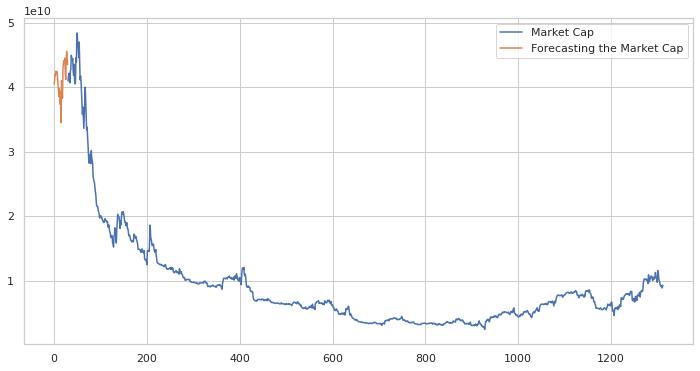

In [ ]:
data['Market Cap'].plot(figsize=(12,6),label='Market Cap')
data['Forecast'].plot(label='Forecasting the Market Cap')
plt.legend()

# **Methodology 4**

Predictions of Market Cap value with LSTM model

## Preparing dataset

In [ ]:
data_original

,Date,Open,High,Low,Close,Volume,Market Cap
1312,2013-12-27,763.28,777.51,713.60,735.07,46862700,9295570000
1311,2013-12-28,737.98,747.06,705.35,727.83,32505800,8990850000
1310,2013-12-29,728.05,748.61,714.44,745.05,19011300,8872600000
1309,2013-12-30,741.35,766.60,740.24,756.13,20707700,9037000000
1308,2013-12-31,760.32,760.58,738.17,754.01,20897300,9268240000
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


The data is taken of 1 year, from 2016-08 to 2017-07, in which starting 70 percent is train data and ending 30 percent is test data

In [ ]:
data_marketcap = data_original.iloc[-365:,[0,-1]]
copy_data = data_marketcap.copy()
data_marketcap

,Date,Market Cap
364,2016-08-01,9860620000
363,2016-08-02,9574320000
362,2016-08-03,8663670000
361,2016-08-04,8943870000
360,2016-08-05,9133690000
...,...,...
4,2017-07-27,41816500000
3,2017-07-28,44144400000
2,2017-07-29,46246700000
1,2017-07-30,44890700000


In [ ]:
del data_marketcap['Date']
scaler=MinMaxScaler(feature_range=(0,1))
data_marketcap=scaler.fit_transform(np.array(data_marketcap).reshape(-1,1))
print(data_marketcap.shape)

(365, 1)


In [ ]:
training_size=int(len(data_marketcap)*0.70)
test_size=len(data_marketcap)-training_size
train_data,test_data=data_marketcap[0:training_size,:],data_marketcap[training_size:len(data_marketcap),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Lookback or time step value is taken as 15, which  means considering 15 days data

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (239, 15, 1)
X_test:  (94, 15, 1)


## Training the LSTM model

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200, batch_size=32, verbose=2, shuffle = False)  

Epoch 1/200
8/8 - 5s - loss: 0.0182 - val_loss: 0.4603 - 5s/epoch - 627ms/step
Epoch 2/200
8/8 - 0s - loss: 0.0104 - val_loss: 0.3547 - 262ms/epoch - 33ms/step
Epoch 3/200
8/8 - 0s - loss: 0.0059 - val_loss: 0.2672 - 244ms/epoch - 30ms/step
Epoch 4/200
8/8 - 0s - loss: 0.0039 - val_loss: 0.2011 - 266ms/epoch - 33ms/step
Epoch 5/200
8/8 - 0s - loss: 0.0034 - val_loss: 0.1568 - 198ms/epoch - 25ms/step
Epoch 6/200
8/8 - 0s - loss: 0.0035 - val_loss: 0.1308 - 203ms/epoch - 25ms/step
Epoch 7/200
8/8 - 0s - loss: 0.0035 - val_loss: 0.1168 - 201ms/epoch - 25ms/step
Epoch 8/200
8/8 - 0s - loss: 0.0034 - val_loss: 0.1083 - 204ms/epoch - 26ms/step
Epoch 9/200
8/8 - 0s - loss: 0.0031 - val_loss: 0.1003 - 235ms/epoch - 29ms/step
Epoch 10/200
8/8 - 0s - loss: 0.0028 - val_loss: 0.0908 - 236ms/epoch - 29ms/step
Epoch 11/200
8/8 - 0s - loss: 0.0025 - val_loss: 0.0795 - 286ms/epoch - 36ms/step
Epoch 12/200
8/8 - 0s - loss: 0.0023 - val_loss: 0.0676 - 178ms/epoch - 22ms/step
Epoch 13/200
8/8 - 0s - los

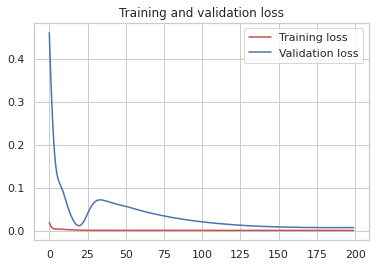

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

## Predicting the test and train r2_scores

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((239, 1), (94, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9649947823101289
Test data R2 score: 0.7922049332548307


In [ ]:
look_back = time_step
trainPredictPlot = np.empty_like(data_marketcap)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape) 

Train predicted data:  (365, 1)


In [ ]:
testPredictPlot = np.empty_like(data_marketcap)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_marketcap)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (365, 1)


## Plotting the Original, train_predictions and test_predictions on one single plot

In [ ]:
from itertools import cycle
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

In [ ]:
plotdf = pd.DataFrame({'date': copy_data['Date'],
                       'original_marketcap': copy_data['Market Cap'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [ ]:
import plotly.express as px
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_marketcap'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin Price','date': 'Date'})
fig.update_layout(title_text='Comparision between original marketcap price vs predicted marketcap price')
fig.show()